In [46]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn import metrics

In [27]:
data = pd.read_csv("HW3Data.csv",header=None, index_col=None)


In [101]:
X=data.ix[:,1:2000]
y=data.ix[:,0]


# normalization on features

In [92]:
X_normalized = preprocessing.normalize(X)


# Split data into train and test

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
         X_normalized, y, test_size=0.2, random_state=0)
print('Train set size %s' % (X_train.shape,))
print('Test set size %s' % (X_test.shape,))

Train set size (49, 2000)
Test set size (13, 2000)



# Recursive feature elimination with cross-validation


A recursive feature elimination example with automatic tuning of the
number of features selected with cross-validation.


Automatically created module for IPython interactive environment
Optimal number of features : 199
Mask of features :
[False False False ..., False False False]
Rank of features :
[1625 1629  896 ...,  315  634  879]


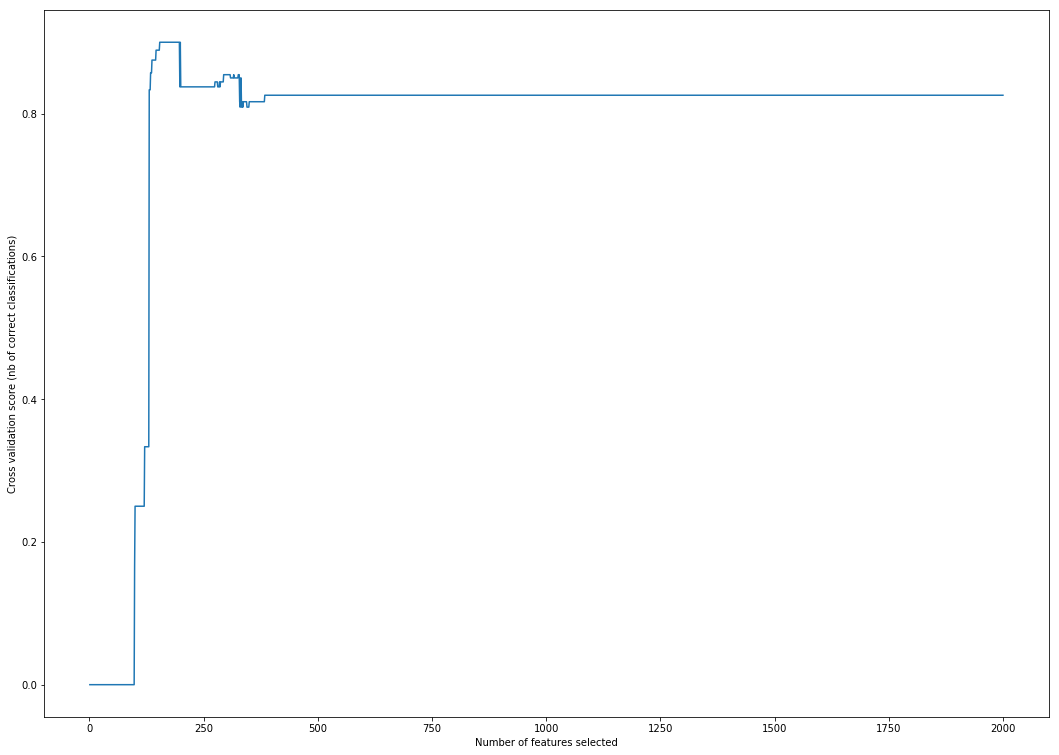

In [114]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='precision')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
print("Mask of features :") 
print(rfecv.support_)
print("Rank of features :") 
print(rfecv.ranking_)
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(18, 13))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


# Prediction based on selected features, and reporting the performance

In [115]:
expected = y_test
predicted =rfecv.predict(X_test)

In [116]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      0.83      0.91        12
          1       0.33      1.00      0.50         1

avg / total       0.95      0.85      0.88        13

[[10  2]
 [ 0  1]]


# Since the problem is focusing on detecting cancer, I prefer to use "recall" function that score the sensitivity,True positive rate, of the predictor.

Automatically created module for IPython interactive environment
Optimal number of features : 2000
Mask of features :
[ True  True  True ...,  True  True  True]
Rank of features :
[1 1 1 ..., 1 1 1]


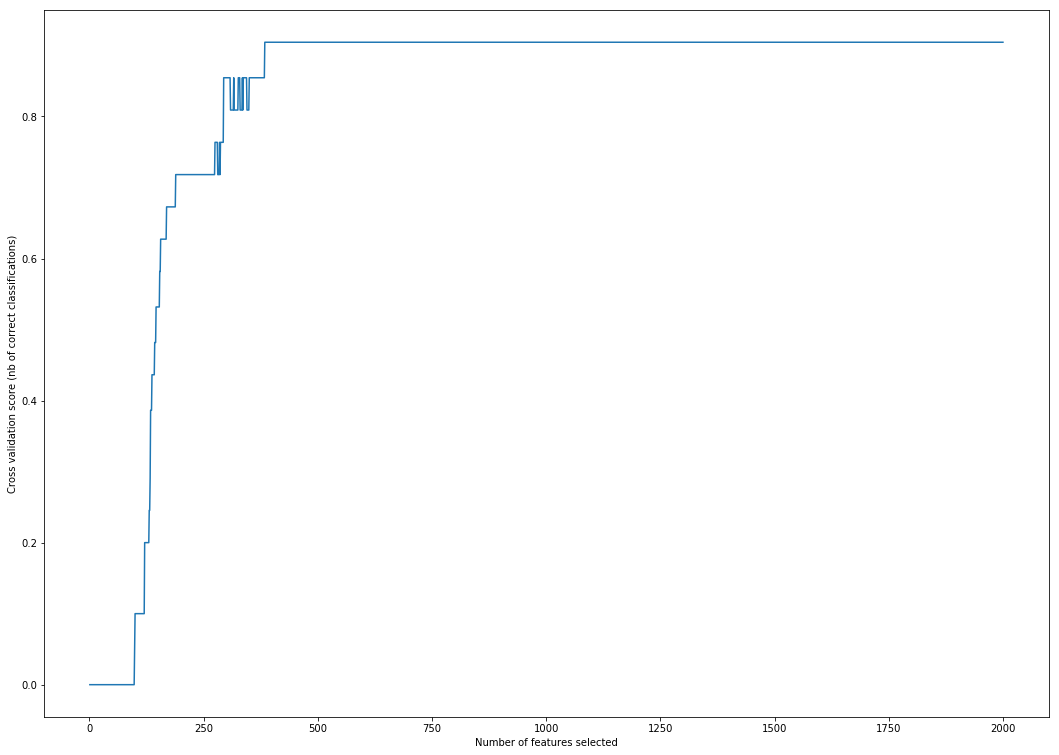

In [117]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='recall')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
print("Mask of features :") 
print(rfecv.support_)
print("Rank of features :") 
print(rfecv.ranking_)
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(18, 13))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


# Although after about 400 features, number of correct classification does not change significantly, REF report optimal number of features= 2000, using this number of features does not change the performance of the predictor.

In [120]:
expected = y_test
predicted =rfecv.predict(X_test)

In [121]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      0.83      0.91        12
          1       0.33      1.00      0.50         1

avg / total       0.95      0.85      0.88        13

[[10  2]
 [ 0  1]]
